## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import csv

# Study data files
mouse_metadata_path = os.path.join ('data', 'Mouse_metadata.csv')
study_results_path = os.path.join ('data', 'Study_results.csv')

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudyDF = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID')
mousestudyDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice in the dataframe
mousestudyDF.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

duplicateframe = mousestudyDF.loc[mousestudyDF.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicateframe

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID

mousestudyDF[mousestudyDF['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

#cleanDF = mousestudyDF.drop_duplicates(subset =)

cleanedDF = mousestudyDF[(mousestudyDF['Mouse ID'] != "g989")]
cleanedDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
cleanedDF.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Group data by Regiment
regsummaryGB = cleanedDF.groupby("Drug Regimen")
regiment = regsummaryGB.count().index

# Calculate Tumor Mean
meantumor = regsummaryGB["Tumor Volume (mm3)"].mean()

# Calculate Tumor Median
mediantumor = regsummaryGB["Tumor Volume (mm3)"].median()

# Calculate Tumor Variance
variancetumor = regsummaryGB["Tumor Volume (mm3)"].var()

# Calculate Tumor Standard Deviation
tumorstdev = regsummaryGB["Tumor Volume (mm3)"].std()

# Calculate Tumor SEM
semtumor = regsummaryGB["Tumor Volume (mm3)"].sem()

# This method is the most straightforward, creating multiple series and putting them all together at the end.

# Add to dataframe regsummary
regsummary = pd.DataFrame({"Drug Regimen": regiment, "Mean Volume": meantumor, "Median Volume": mediantumor, 
                                "Variance Volume": variancetumor, "Standard Deviation": tumorstdev, 
                                "SEM": semtumor})

# Clean dataframe index
regsummary = regsummary.reset_index(drop=True)

regsummary

,Drug Regimen,Mean Volume,Median Volume,Variance Volume,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method shows all data in one groupby function

regaggsumDF = pd.DataFrame(cleanedDF.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}))
regaggsumDF

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

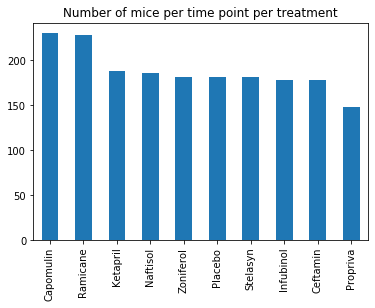

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# Create new frames for appropriate categories and group by using cleaned dataframe

counts = cleanedDF["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.title("Number of mice per time point per treatment")
plt.show()

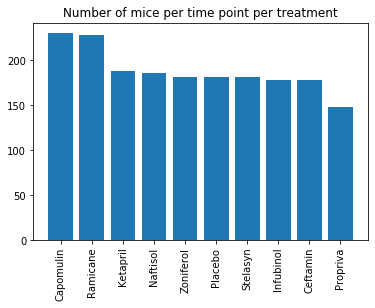

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

counts = cleanedDF["Drug Regimen"].value_counts()
x=counts.index.values
y=counts.values
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.title("Number of mice per time point per treatment")
plt.show();


## Pie Plots

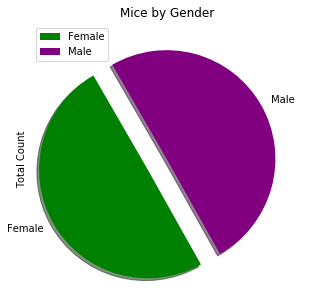

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Grouping by grouping on sex and mouse ID
genderGB = mousestudyDF.groupby(["Mouse ID", "Sex"])

# Dataframe.size syntax
# Returns size of dataframe/series equivalent tot total amount of elements (rows x columns)
mousegender = pd.DataFrame(genderGB.size())

# Create a dataframe with the total count of female and male mice
# Groupby gender to count amount of male and female mice
finalmousegender = pd.DataFrame(mousegender.groupby(["Sex"]).count())
finalmousegender.columns = ["Total Count"]

# Format % of female vs male
finalmousegender["Percentage of Sex"] = (100*(finalmousegender["Total Count"]/finalmousegender["Total Count"].sum()))

# Format % of gender column
finalmousegender["Percentage of Sex"] = finalmousegender["Percentage of Sex"]
finalmousegender

# Create pie plot female/male mice distribution using pandas

colors = ['green', 'purple']
explode = (0.2, 0)
plot = finalmousegender.plot.pie(y="Total Count", figsize=(5,5), colors = colors, startangle=120, explode = explode, shadow = True)
plot.set_title("Mice by Gender")
plt.show()

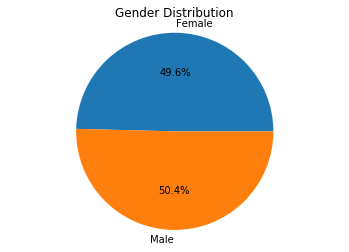

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create new dataframe with cleaned data to set genders apart and count unique mice via mouse ID
genders = cleanedDF['Sex'].unique()
counts = cleanedDF.groupby(['Sex'])['Mouse ID'].nunique()

# Set up pie chart, give it a title, give axis corrext labels, make it look like a circle
plt.pie(counts, labels = genders, autopct = "%1.1f%%")
plt.axis("equal")
plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
#Capomulin
Capomulin_df = mousestudyDF.loc[mousestudyDF["Drug Regimen"] == "Capomulin",:]
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, mousestudyDF, on=("Mouse ID","Timepoint"),how="left")
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]
quartiles = Capomulin_merge["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
outlier = Capomulin_tumors.loc[(Capomulin_tumors<lowerq) | (Capomulin_tumors>upperq)]
print(f"outlier {outlier}")

print(Capomulin_df)
print(Capomulin_tumors)
print("Capomulin")
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"Interquartile Range: {iqr}")
print(f"Median of tumor volume: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")
 

#Ramicane
Ramicane_df = mousestudyDF.loc[mousestudyDF["Drug Regimen"] == "Ramicane",:]
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, mousestudyDF, on=("Mouse ID","Timepoint"),how="left")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]
quartiles = Ramicane_merge["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
outlier = Ramicane_tumors.loc[(Ramicane_tumors<lowerq) | (Ramicane_tumors>upperq)]
print(f"outlier {outlier}")


print("---------------")
print("Ramicane")
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"Interquartile Range: {iqr}")
print(f"Median of tumor volume: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

# #Infubinol
Infubinol_df = mousestudyDF.loc[mousestudyDF["Drug Regimen"] == "Infubinol",:]
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, mousestudyDF, on=("Mouse ID","Timepoint"),how="left")
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]
quartiles = Infubinol_merge["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
outlier = Ramicane_tumors.loc[(Ramicane_tumors<lowerq) | (Ramicane_tumors>upperq)]
print(f"outlier {outlier}")



print("---------------")
print("Infubinol")
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"Interquartile Range: {iqr}")
print(f"Median of tumor volume: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

# #Ceftamin
Ceftamin_df = mousestudyDF.loc[mousestudyDF["Drug Regimen"] == "Ceftamin",:]
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, mousestudyDF, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = Ceftamin_merge["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
outlier = Ramicane_tumors.loc[(Ramicane_tumors<lowerq) | (Ramicane_tumors>upperq)]
print(f"outlier {outlier}")


print("---------------")
print("Ceftamin")
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"Interquartile Range: {iqr}")
print(f"Median of tumor volume: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")


outlier 2     30.485985
5     47.685963
9     41.483008
11    28.430964
13    46.539206
15    41.581521
16    23.343598
17    40.728578
19    31.023923
20    40.658124
23    28.484033
24    31.896238
Name: Tumor Volume (mm3), dtype: float64
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
226      j246          0           45.000000                 0    Capomulin   
227      r554          0           45.000000                 0    Capomulin   
228      s185          0           45.000000                 0    Capomulin   
229      b742          0           45.000000                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1854     s710         45           40.728578                 1    Capomulin   
1859     j119         45           38.125164                 1    Capomulin   
1878     i557         45           47.685963    

In [15]:
# maxtumorvol = cleanedDF.groupby("Mouse ID").max()
# maxtumorvol = maxtumorvol.reset_index()
# mergedata = maxtumorvol[["Mouse ID", "Timepoint"]].merge(cleanedDF, on = ["Mouse ID", "Timepoint"], how = 'left')
# cap = mergedata.loc[mergedata["Drug Regimen"]== 'Capomulin']["Tumor Volume (mm3)"]
# ram = mergedata.loc[mergedata["Drug Regimen"]== 'Ramicane']["Tumor Volume (mm3)"]
# ceft = mergedata.loc[mergedata["Drug Regimen"]== 'Ceftamin']["Tumor Volume (mm3)"]
# inf = mergedata.loc[mergedata["Drug Regimen"]== 'Infubinol']["Tumor Volume (mm3)"]

# print("cap",":", len(cap))
# print("ram",":", len(ram))
# print("ceft",":", len(ceft))
# print("inf",":", len(inf))

In [16]:
# Filter data using upper and lower bound values for each regimen to find outliers
# Only Infubinol has outliers
# outram = 
# outcap
# outceft

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Extract the top 4 regimens from the DataFrame in order to find IQR
# The isin() function is used to check each element in the DataFrame is contained in values or not. 
topdrugs = mousestudyDF[mousestudyDF["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
topdrugs = topdrugs.sort_values(["Timepoint"], ascending = True)
#Run to check 
topdrugs
# Organize DataFrame w/ columns neccessary 
topdrugsDF = topdrugs[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
# Run to check 
topdrugsDF
#Group data by protocol drug and Mouse ID to capture Last Tumor Measurement
topdrugsGBDF = topdrugsDF.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
#Run to check 
topdrugsGBDF.head()
# Update organized dataframe to manipulate data 
topdrugsGBDF = topdrugsGBDF.to_frame()

topdrugsGBDF

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

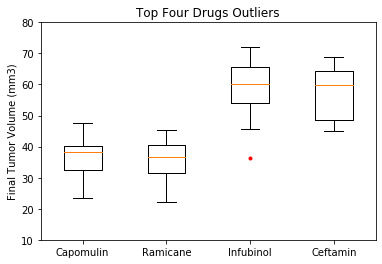

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Create a list to use as labels and dataframe
topfour = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplotDF = topdrugsGBDF.reset_index()
tumorlists = topdrugsGBDF.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumorlistDF = pd.DataFrame(tumorlists)
tumorlistDF = tumorlistDF.reindex(topfour)
tumorvol = [vol for vol in tumorlistDF["Tumor Volume (mm3)"]]
# Display boxplot             
plt.boxplot(tumorvol, labels = topfour, sym='r.')
plt.ylim(10, 80)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Top Four Drugs Outliers")
plt.show()

## Line and Scatter Plots

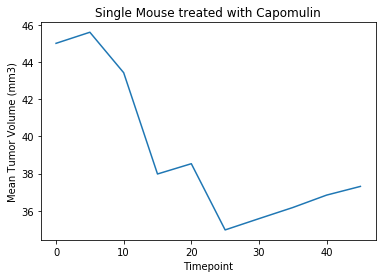

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

timevstumvol = mousestudyDF[mousestudyDF["Mouse ID"].isin(["i738"])]

#check
timevstumvol

#update data with necessary vars for line plot

timevstumvolDF = timevstumvol[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

#check
timevstumvolDF

# reset index
# .reset_index() this method removes one or more levels

lineplotDF = timevstumvolDF.reset_index()

#check
lineplotDF

# Finalize line plot with vars

finallineplotDF = lineplotDF[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
finallineplotDF

# Display line plot
#lines = finallineplotDF.plot.line()

# Create new dataframe specifically for Capomulin

xs=finallineplotDF.Timepoint
ys=finallineplotDF['Tumor Volume (mm3)']

plt.plot(xs,ys)
plt.xlabel("Timepoint")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.title("Single Mouse treated with Capomulin")
plt.show()

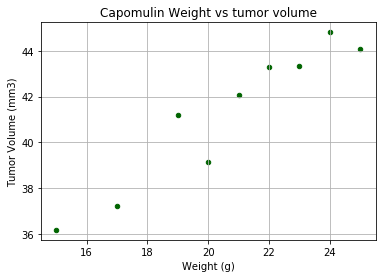

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Extract spec data i.e. all Capomulin form "drug regimen"
caposcatter = mousestudyDF[mousestudyDF["Drug Regimen"].isin(["Capomulin"])]

# Create new dataframe with specific mouse ID, weight, and tumor volume
capomulinscatterDF = topdrugs[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# sort by values along axis
caposcatterDF = caposcatter.sort_values(["Weight (g)"], ascending = True)

# Reset index
# reset_index() method sets list of integer ranging from 0 to length of data as index
caposcatterplot = caposcatter.reset_index()

# bring scatter plot by groupby the axis' weight & tumor volume mean
capogroupweight = caposcatterplot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

# create dataframe
capogroupplot = pd.DataFrame(capogroupweight).reset_index()

capomulinscatter = capogroupplot.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)', grid = True, c = 'DarkGreen')
plt.title("Capomulin Weight vs tumor volume")
plt.show()

## Correlation and Regression

R-squared: 0.9034966277438602


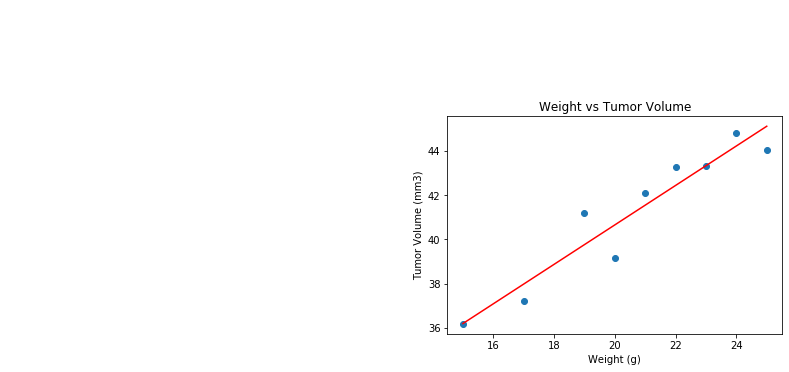

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capogroupplot["Weight (g)"]
y_values = capogroupplot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("Weight vs Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"R-squared: {rvalue**2}")
plt.show()